<a href="https://colab.research.google.com/github/bminnozzi/Titanic_Kaggle/blob/master/Titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [298]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [299]:
from google.colab import files
uploaded = files.upload()

Saving test.csv to test (6).csv
Saving train.csv to train (6).csv


In [339]:
import io
df_test1 = pd.read_csv(io.BytesIO(uploaded['test.csv']))
df_train = pd.read_csv(io.BytesIO(uploaded['train.csv']))
df_test = df_test1.copy()

In [301]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [302]:
df_test.head() 

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [303]:
df_train['Survived'].mean()

0.3838383838383838

In [304]:
df_train['Pclass'] = df_train['Pclass'].replace([1,2,3],['primera','segunda','tercera'])
df_train.head()

df_test['Pclass'] = df_test['Pclass'].replace([1,2,3],['primera','segunda','tercera'])
df_test.head()


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,tercera,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,tercera,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,segunda,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,tercera,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,tercera,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


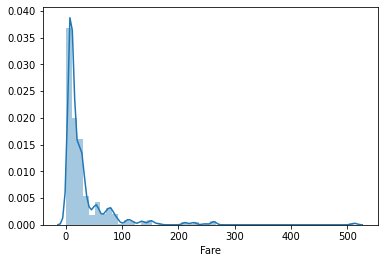

In [305]:
sns.distplot(df_train['Fare'])

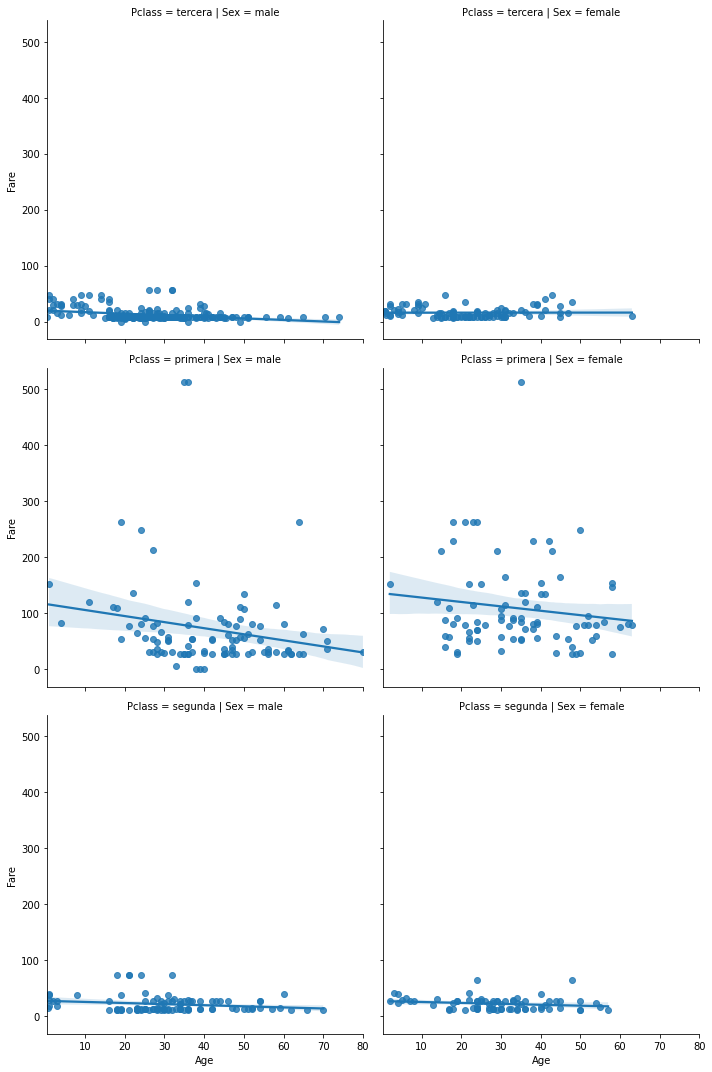

In [306]:

sns.lmplot(x='Age',y='Fare',data=df_train,col='Sex',row='Pclass')

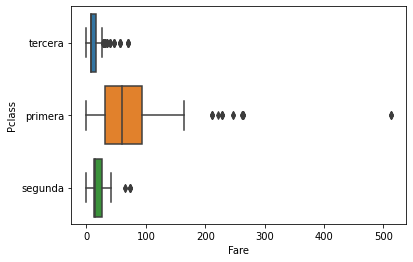

In [307]:
sns.boxplot(data=df_train,y='Pclass',x='Fare')

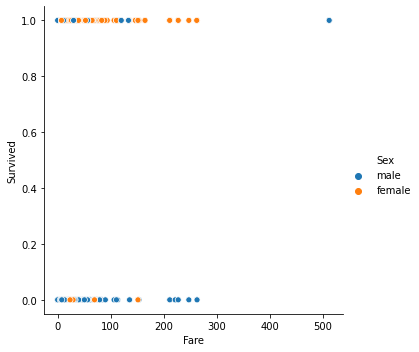

In [308]:
sns.relplot(y='Survived', x='Fare', data=df_train,kind='scatter',hue='Sex')

In [309]:
df_train = df_train[df_train['Fare'] < 300]


In [310]:
df_train = df_train.iloc[:,[1,2,4,5,6,7,9]]
df_test = df_test.iloc[:,[1,3,4,5,6,8]]

In [311]:
df_test.describe()

,Age,SibSp,Parch,Fare
count,332.000000,418.000000,418.000000,417.000000
mean,30.272590,0.447368,0.392344,35.627188
std,14.181209,0.896760,0.981429,55.907576
min,0.170000,0.000000,0.000000,0.000000
25%,21.000000,0.000000,0.000000,7.895800
50%,27.000000,0.000000,0.000000,14.454200
75%,39.000000,1.000000,0.000000,31.500000
max,76.000000,8.000000,9.000000,512.329200


In [312]:
df_train.describe()

,Survived,Age,SibSp,Parch,Fare
count,888.000000,711.000000,888.000000,888.000000,888.000000
mean,0.381757,29.675345,0.524775,0.381757,30.582164
std,0.486091,14.552495,1.104186,0.806949,41.176366
min,0.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,20.000000,0.000000,0.000000,7.895800
50%,0.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,38.000000,1.000000,0.000000,30.771850
max,1.000000,80.000000,8.000000,6.000000,263.000000


In [313]:
df_train['Age'].isna().sum()

df_train['Age'].fillna(df_train['Age'].median(),inplace=True)

df_test['Age'].isna().sum()

df_test['Age'].fillna(df_train['Age'].median(),inplace=True)


In [314]:
df_train['Survived'].value_counts()

0    549
1    339
Name: Survived, dtype: int64

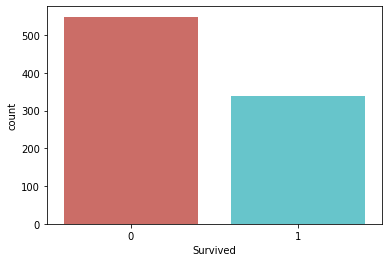

In [315]:
sns.countplot(x='Survived',data=df_train,palette='hls')

In [316]:
df_train.groupby('Survived').mean()

,Age,SibSp,Parch,Fare
Survived,,,,
0,30.028233,0.553734,0.329690,22.117887
1,28.229115,0.477876,0.466077,44.289799


In [317]:
df_train.groupby('Pclass').mean()

,Survived,Age,SibSp,Parch,Fare
Pclass,,,,,
primera,0.624413,36.832958,0.422535,0.356808,78.124061
segunda,0.472826,29.765380,0.402174,0.380435,20.662183
tercera,0.242363,25.932627,0.615071,0.393075,13.675550


In [318]:
df_train.groupby('Sex').mean()

,Survived,Age,SibSp,Parch,Fare
Sex,,,,,
female,0.741214,27.907348,0.696486,0.651757,42.985091
male,0.186087,30.122035,0.431304,0.234783,23.830658


In [319]:
#One hot encoding


df_train = pd.concat([df_train,pd.get_dummies(df_train['Pclass'], prefix='clase')],axis=1).drop(['clase_tercera','Pclass'],axis=1)

df_train = pd.concat([df_train,pd.get_dummies(df_train['Sex'], prefix='sex')],axis=1).drop(['sex_female','Sex'],axis=1)

df_test = pd.concat([df_test,pd.get_dummies(df_test['Pclass'], prefix='clase')],axis=1).drop(['clase_tercera','Pclass'],axis=1)

df_test = pd.concat([df_test,pd.get_dummies(df_test['Sex'], prefix='sex')],axis=1).drop(['sex_female','Sex'],axis=1)

In [320]:
df_train

,Survived,Age,SibSp,Parch,Fare,clase_primera,clase_segunda,sex_male
0,0,22.0,1,0,7.2500,0,0,1
1,1,38.0,1,0,71.2833,1,0,0
2,1,26.0,0,0,7.9250,0,0,0
3,1,35.0,1,0,53.1000,1,0,0
4,0,35.0,0,0,8.0500,0,0,1
...,...,...,...,...,...,...,...,...
886,0,27.0,0,0,13.0000,0,1,1
887,1,19.0,0,0,30.0000,1,0,0
888,0,28.0,1,2,23.4500,0,0,0
889,1,26.0,0,0,30.0000,1,0,1


In [321]:
logreg = LogisticRegression()

In [330]:
cols=['clase_primera','clase_segunda','sex_male','Age','SibSp','Parch','Fare']
x_train = df_train[cols]
y_train = df_train['Survived']

cols=['clase_primera','clase_segunda','sex_male','Age','SibSp','Parch','Fare']
x_test = df_test[cols]


In [331]:
import statsmodels.api as sm
logit_model = sm.Logit(y,x)
result = logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.467391
         Iterations 6
                         Results: Logit
Model:              Logit            Pseudo R-squared: 0.297     
Dependent Variable: Survived         AIC:              836.0862  
Date:               2020-06-29 22:42 BIC:              850.4532  
No. Observations:   888              Log-Likelihood:   -415.04   
Df Model:           2                LL-Null:          -590.45   
Df Residuals:       885              LLR p-value:      6.6549e-77
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     6.0000                                       
-----------------------------------------------------------------
                  Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
-----------------------------------------------------------------
clase_primera     2.0648   0.1994  10.3545 0.0000  1.6739  2.4556
clase_segunda     1.3001   0.1980   6.5668 0.0000  0.9121  1.6881


In [332]:
cols=['clase_primera','clase_segunda','sex_male']
x_train = df_train[cols]
y_train = df_train['Survived']

cols=['clase_primera','clase_segunda','sex_male']
x_test = df_test[cols]


In [333]:
import statsmodels.api as sm
logit_model = sm.Logit(y,x)
result = logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.467391
         Iterations 6
                         Results: Logit
Model:              Logit            Pseudo R-squared: 0.297     
Dependent Variable: Survived         AIC:              836.0862  
Date:               2020-06-29 22:42 BIC:              850.4532  
No. Observations:   888              Log-Likelihood:   -415.04   
Df Model:           2                LL-Null:          -590.45   
Df Residuals:       885              LLR p-value:      6.6549e-77
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     6.0000                                       
-----------------------------------------------------------------
                  Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
-----------------------------------------------------------------
clase_primera     2.0648   0.1994  10.3545 0.0000  1.6739  2.4556
clase_segunda     1.3001   0.1980   6.5668 0.0000  0.9121  1.6881


In [334]:
logreg = LogisticRegression()
logreg.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [337]:
y_pred = logreg.predict(x_test)
y_pred

array([0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [356]:
df_pred = df_test1[['PassengerId']]
df_pred['Survived'] = y_pred
df_pred

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [358]:
df_pred.to_csv('df_pred.csv') 
files.download('df_pred.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>